In [1]:
# import libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Load the data.

In [2]:
filename = "dge_normalized.txt"
gene_sc_df = pd.read_csv(filename, delimiter="\t", header=0)
X = gene_sc_df.T
print(X.shape)  #cells X #genes

(1297, 8924)


In [3]:
# extract the spatial labels of the Drosophila cells, each cell has the name: cell_cluster#
# Reference for visualizing the clusters: https://shiny.mdc-berlin.de/DVEX/
cell_clusters = []
for cell_name in list(X.index):
    cell_clusters.append(int(cell_name.split("_")[1]))

In [4]:
def fit_tsne(data_df, num_components, num_rounds, perplex, num_iter):
    # t-SNE
    min_kl_divergence = 0
    best_embedding = None
    for i in range(num_rounds):
        tsne = TSNE(n_components=num_components, perplexity=perplex, n_iter=num_iter)
        transformed_data = tsne.fit_transform(data_df)
        if (i == 0):
            min_kl_divergence = tsne.kl_divergence_
            best_embedding = transformed_data
        elif min_kl_divergence > tsne.kl_divergence_:
            min_kl_divergence = tsne.kl_divergence_
            best_embedding = transformed_data
    return best_embedding

In [5]:
def scatterplot_2d(data_2d, x_col, y_col, cluster_labels_col, plot_title):
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")
    sns.lmplot(x=x_col, y=y_col, data=data_2d, fit_reg=False, legend=True,
               size=11, hue=cluster_labels_col, scatter_kws={"s":200, "alpha":0.3})
    plt.title(plot_title, weight="bold").set_fontsize("14")
    plt.xlabel(x_col, weight="bold").set_fontsize("10")
    plt.ylabel(y_col, weight="bold").set_fontsize("10")

Performing feature reduction with PCA followed by t-SNE.

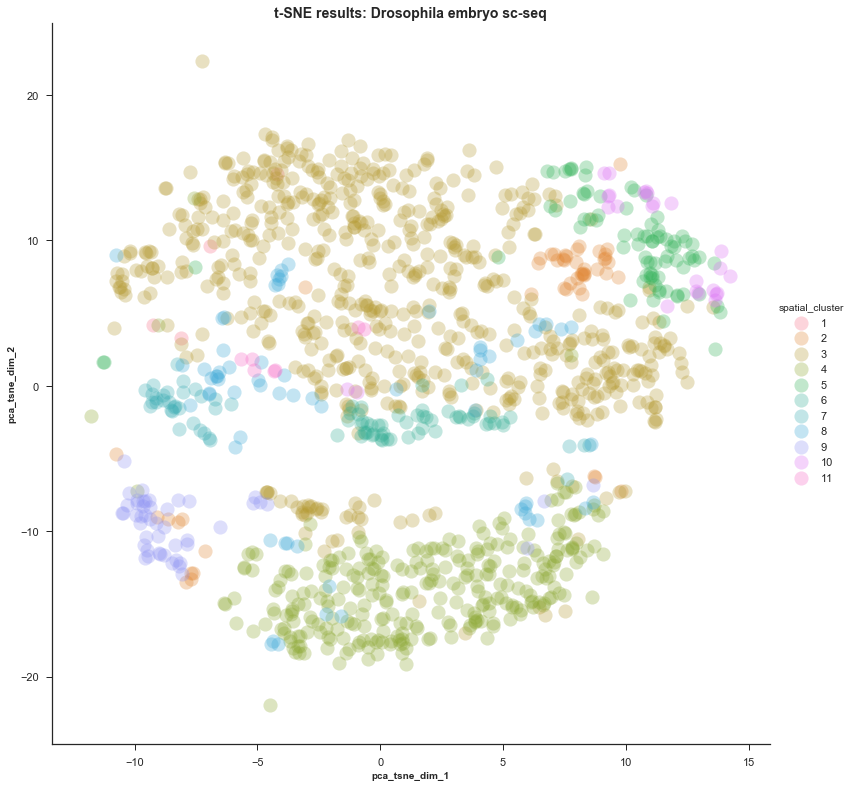

In [9]:
# PCA to ~50 dimensions and then t-SNE
pca = PCA(n_components=50)
X_pca_50 = pca.fit_transform(X)
# apply t-SNE to this PCA reduced dataset
# t-SNE parameters
num_rounds = 10
perplexity = 75
num_iterations = 3000
X_pca_tsne_2 = fit_tsne(X_pca_50, num_components=2, num_rounds=num_rounds, perplex=perplexity, num_iter=num_iterations)
# append spatial cluster labels to the dataframe
X_pca_tsne_2 = pd.DataFrame(X_pca_tsne_2, columns=['pca_tsne_dim_1', 'pca_tsne_dim_2'])
X_pca_tsne_2["spatial_cluster"] = pd.Series(cell_clusters).values
# plot this data in 2 dimensions
scatterplot_2d(X_pca_tsne_2, "pca_tsne_dim_1", "pca_tsne_dim_2", "spatial_cluster", "t-SNE results: Drosophila embryo sc-seq")
plt.show()

In [ ]:
X_pca_tsne_2.to_csv("pca_tsne_data.csv", sep='\t', header=True, index=False)

Performing feature reduction using t-SNE.

In [ ]:
# perform dimensionality reduction using t-SNE
X_tsne_2 = fit_tsne(X, num_components=2, num_rounds=10, perplex=100, num_iter=3000)

In [ ]:
# append spatial cluster labels to the dataframe
X_tsne_2 = pd.DataFrame(X_tsne_2, columns=['tsne_dim_1', 'tsne_dim_2'])
X_tsne_2["spatial_cluster"] = pd.Series(cell_clusters).values
# plot this data in 2 dimensions
scatterplot_2d(X_tsne_2, "tsne_dim_1", "tsne_dim_2", "spatial_cluster", "t-SNE results: Drosophila embryo sc-seq")
plt.show()

t-SNE  
- https://www.kdnuggets.com/2018/08/introduction-t-sne-python.html
- https://scikit-learn.org/stable/modules/manifold.html#t-sne
- https://distill.pub/2016/misread-tsne/
- https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
- https://lvdmaaten.github.io/tsne/
- https://github.com/aviolante/sas-python-work/blob/master/tSneExampleBlogPost.ipynb